In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
from sklearn.datasets import load_digits
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [10]:
df=pd.DataFrame(digits.data)
df['target']=digits.target
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

In [12]:
x_test.shape

(360, 64)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [15]:
knn.score(x_test, y_test)

0.9861111111111112

In [22]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(
    KNeighborsClassifier(),
    {'n_neighbors':[i for i in range(1,26)]},
    cv=5, return_train_score=True
    )
clf.fit(digits.data, digits.target)
scores = pd.DataFrame(clf.cv_results_)[['param_n_neighbors','mean_train_score','mean_test_score']]
scores

,param_n_neighbors,mean_train_score,mean_test_score
0,1,1.000000,0.964393
1,2,0.991375,0.967171
2,3,0.993600,0.966622
3,4,0.992070,0.963841
4,5,0.990818,0.962728
5,6,0.989705,0.959386
6,7,0.989983,0.959946
7,8,0.988592,0.958276
8,9,0.987897,0.956611
9,10,0.986644,0.954943


(0.94, 1.002698081089446)

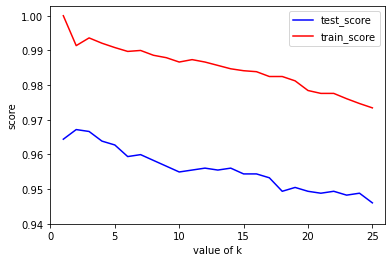

In [31]:
plt.plot(scores.param_n_neighbors, scores.mean_test_score,color='blue')
plt.plot(scores.param_n_neighbors, scores.mean_train_score,color='red')
plt.legend(['test_score','train_score'])
plt.xlabel('value of k')
plt.ylabel('score')
plt.xlim(0,26)
plt.ylim(0.94,)

<b> Maximum Test Score accuracy is at K = 2, Accuracy = 96.7171%</b>

In [20]:
y_pred =knn.predict(x_test)

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 45,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 30,  0],
       [ 0,  0,  0,  0,  1,  1,  0,  0,  0, 38]], dtype=int64)

Text(51.0, 0.5, 'Predicted Value')

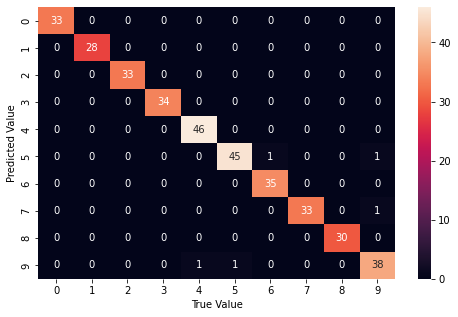

In [34]:
import seaborn as sb
plt.figure(figsize=(8,5))
sb.heatmap(cm,annot=True)
plt.xlabel('True Value')
plt.ylabel('Predicted Value')

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       0.98      1.00      0.99        46
           5       0.98      0.96      0.97        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      1.00      1.00        30
           9       0.95      0.95      0.95        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

